# Deutsch Jozsa

In [82]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [83]:
n = 2 # the length of the first register for querying the oracle 

# Choose a type of oracle at random. With probability half it is constant, 
# and with the same probability it is balanced
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle. 

# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1) #all qubits are initialized to zero
# for recording the measurement on the first register
cr = ClassicalRegister(n)

circuitName = "DeutschJozsa"
qc = QuantumCircuit(qr, cr)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
for i in range(n):
    qc.h(qr[i])

# Flip the second register and apply the Hadamard gate.
qc.x(qr[n])
qc.h(qr[n])
    
# Apply barrier to mark the beginning of the oracle
qc.barrier()

if oracleType == 0: #If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        qc.x(qr[n])
    else:
        qc.id(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            qc.cx(qr[i], qr[n])
        
# Apply barrier to mark the end of the oracle
qc.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    qc.h(qr[i])
    
# Measurement
qc.barrier()
for i in range(n):
    qc.measure(qr[i], cr[i])

The oracle returns a balanced function


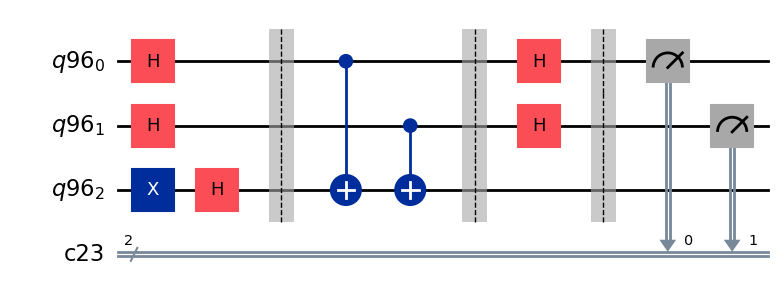

In [84]:
%matplotlib inline
qc.draw(output='mpl')

{'11': 1024}


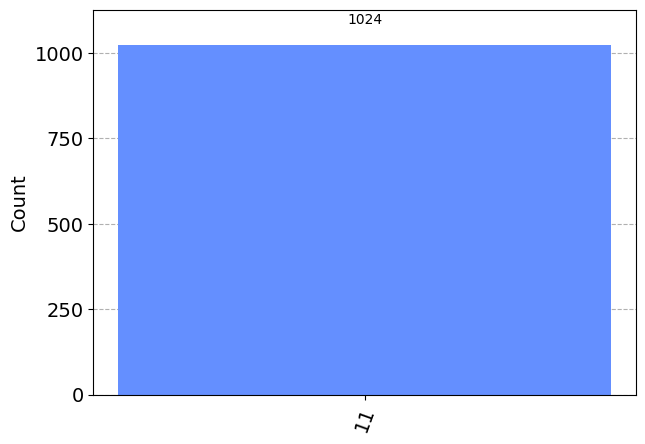

In [85]:
# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

Measure the first register. If it is non-zero, then conclude that the hidden Boolean function is balanced. Otherwise, conclude that it is constant.

When the hidden Boolean function is constant, the quantum states before and after querying the oracle are the same. The inverse of the Hadamard gate is the Hadamard gate itself. Thus, by Step 5, we essentially reverse Step 2 to obtain the initial quantum state of all-zero at the first register.

When the hidden Boolean function is balanced, the quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, by Step 5, when reverting the operation, we must end up with a quantum state that is orthogonal to the initial quantum state of all-zero at the first register. This means we should never obtain the all-zero state.